In [1]:
project_description = """
Project Title
Forecasting Electric Vehicle Adoption in the United States Using Machine Learning

Executive Summary
Future electric vehicle (EV) adoption in the United States can be forecast by analyzing historical EV sales trends alongside the current number of EVs on the road. Historical sales data reveal how rapidly EV adoption has grown and how consumers have responded to improvements in technology, pricing, and government incentives. The current EV population reflects market acceptance and progress toward widespread adoption. When combined, these data provide a strong foundation for projecting future EV growth and support informed planning by policymakers, businesses, and utilities for charging infrastructure, energy demand, and long-term transportation needs.

Rationale
Understanding future EV adoption is critical for effective planning and investment. Automakers need reliable forecasts to scale production, utilities must anticipate changes in electricity demand, and city planners must determine where and when charging infrastructure should be deployed. Poor forecasts could result in overinvestment, wasted resources, or infrastructure shortages that slow adoption.

This analysis transforms historical data into actionable insights about future EV demand. By using data-driven methods, the project supports better decision-making, more efficient allocation of resources, and a smoother transition to electric transportation.

Research Question
How can historical EV sales patterns and the current EV population be used to forecast future electric vehicle adoption in the United States using machine learning techniques?

Data Sources
https://www.kaggle.com/datasets/jainaru/electric-car-sales-2010-2024
"""

print(project_description)



Project Title
Forecasting Electric Vehicle Adoption in the United States Using Machine Learning

Executive Summary
Future electric vehicle (EV) adoption in the United States can be forecast by analyzing historical EV sales trends alongside the current number of EVs on the road. Historical sales data reveal how rapidly EV adoption has grown and how consumers have responded to improvements in technology, pricing, and government incentives. The current EV population reflects market acceptance and progress toward widespread adoption. When combined, these data provide a strong foundation for projecting future EV growth and support informed planning by policymakers, businesses, and utilities for charging infrastructure, energy demand, and long-term transportation needs.

Rationale
Understanding future EV adoption is critical for effective planning and investment. Automakers need reliable forecasts to scale production, utilities must anticipate changes in electricity demand, and city planner

In [41]:
import pandas as pd
import numpy as np 
import pandas as pd 
import time

from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.svm import LinearSVC

In [4]:
df = pd.read_csv('data/IEA-EV-dataEV salesHistoricalCars.csv')

In [5]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [6]:
#Check the data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      3798 non-null   object 
 1   category    3798 non-null   object 
 2   parameter   3798 non-null   object 
 3   mode        3798 non-null   object 
 4   powertrain  3798 non-null   object 
 5   year        3798 non-null   int64  
 6   unit        3798 non-null   object 
 7   value       3798 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 237.5+ KB


In [7]:
#checking missing values
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [8]:
df.shape

(3798, 8)

In [9]:
df.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [13]:
df.nunique()

region         52
category        1
parameter       7
mode            1
powertrain      4
year           14
unit            5
value         814
dtype: int64

In [14]:
df.describe()

,year,value
count,3798.000000,3.798000e+03
mean,2017.369932,1.009542e+05
std,3.809226,8.184402e+05
min,2010.000000,1.500000e-05
25%,2014.000000,2.300000e+00
50%,2018.000000,1.900000e+02
75%,2021.000000,6.800000e+03
max,2023.000000,2.800000e+07


In [15]:
ev_sales = df[df["parameter"] == "EV sales"]
ev_sales

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
6,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.0
9,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
10,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190.0
13,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100.0
...,...,...,...,...,...,...,...,...
3781,World,Historical,EV sales,Cars,FCEV,2022,Vehicles,15000.0
3783,World,Historical,EV sales,Cars,PHEV,2022,Vehicles,2900000.0
3788,World,Historical,EV sales,Cars,PHEV,2023,Vehicles,4300000.0
3792,World,Historical,EV sales,Cars,FCEV,2023,Vehicles,8900.0


In [16]:
ev_sales_share = df[df["parameter"] == "EV sales share"]
ev_sales_share

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.0065
7,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.0300
12,Australia,Historical,EV sales share,Cars,EV,2013,percent,0.0340
19,Australia,Historical,EV sales share,Cars,EV,2014,percent,0.1600
24,Australia,Historical,EV sales share,Cars,EV,2015,percent,0.2000
...,...,...,...,...,...,...,...,...
3751,World,Historical,EV sales share,Cars,EV,2019,percent,2.6000
3756,World,Historical,EV sales share,Cars,EV,2020,percent,4.2000
3773,World,Historical,EV sales share,Cars,EV,2021,percent,8.9000
3778,World,Historical,EV sales share,Cars,EV,2022,percent,14.0000


In [17]:
df.groupby("year")["value"].count()

year
2010    135
2011    182
2012    203
2013    223
2014    238
2015    287
2016    289
2017    294
2018    301
2019    319
2020    321
2021    338
2022    336
2023    332
Name: value, dtype: int64

In [18]:
df.groupby("powertrain")["value"].count()

powertrain
BEV     1078
EV      1311
FCEV     487
PHEV     922
Name: value, dtype: int64

In [25]:
ev_sales = df[df["parameter"] == "EV sales"]

global_sales = (
    ev_sales
    .groupby("year")["value"]
    .sum()
    .reset_index()
)

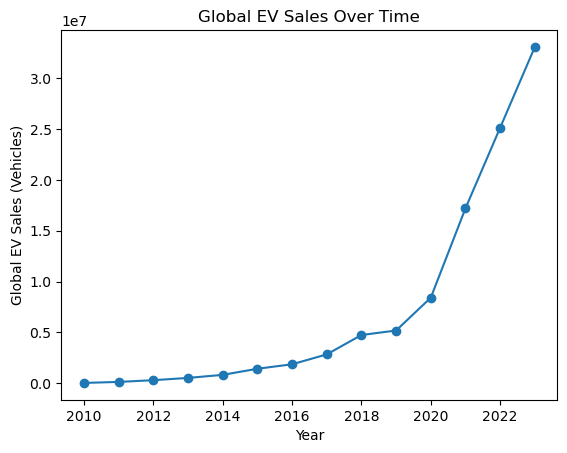

In [31]:
plt.figure()
plt.plot(global_sales["year"], global_sales["value"], marker="o")
plt.xlabel("Year")
plt.ylabel("Global EV Sales (Vehicles)")
plt.title("Global EV Sales Over Time")
plt.show()



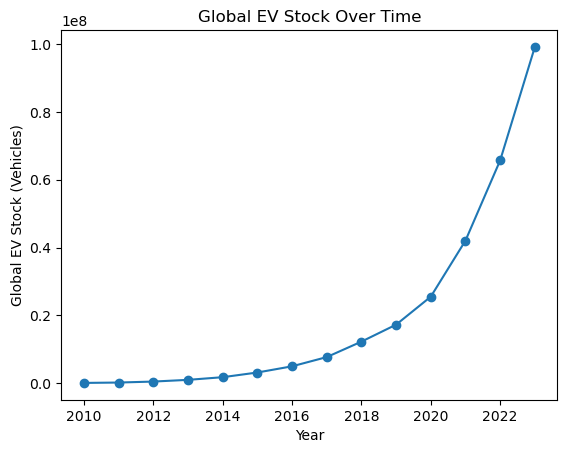

In [27]:
ev_stock = df[df["parameter"] == "EV stock"]

global_stock = (
    ev_stock
    .groupby("year")["value"]
    .sum()
    .reset_index()
)

plt.figure()
plt.plot(global_stock["year"], global_stock["value"], marker="o")
plt.xlabel("Year")
plt.ylabel("Global EV Stock (Vehicles)")
plt.title("Global EV Stock Over Time")
plt.show()


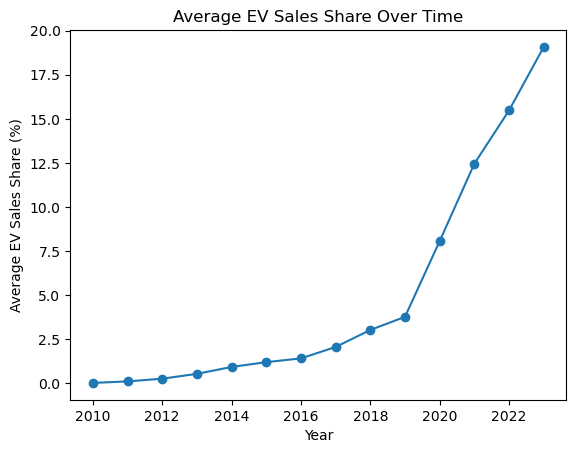

In [29]:
ev_sales_share = df[df["parameter"] == "EV sales share"]

avg_sales_share = (
    ev_sales_share
    .groupby("year")["value"]
    .mean()
    .reset_index()
)

plt.figure()
plt.plot(avg_sales_share["year"], avg_sales_share["value"], marker="o")
plt.xlabel("Year")
plt.ylabel("Average EV Sales Share (%)")
plt.title("Average EV Sales Share Over Time")
plt.show()


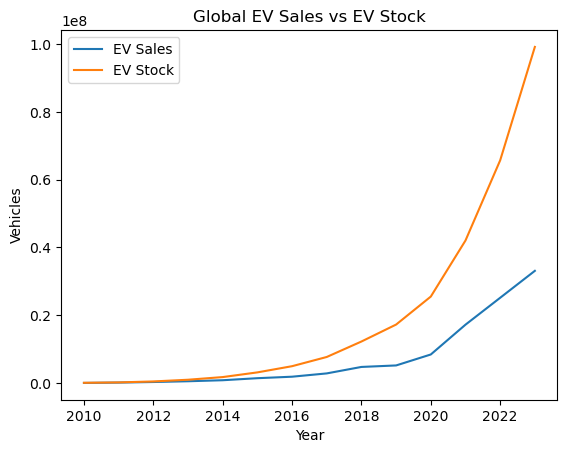

In [30]:
plt.figure()
plt.plot(global_sales["year"], global_sales["value"], label="EV Sales")
plt.plot(global_stock["year"], global_stock["value"], label="EV Stock")
plt.xlabel("Year")
plt.ylabel("Vehicles")
plt.title("Global EV Sales vs EV Stock")
plt.legend()
plt.show()


In [32]:
print('The visual EDA shows that global EV adoption follows a clear diffusion pattern. EV sales grow slowly in the early years and accelerate sharply after 2019, while EV stock increases smoothly and rapidly as a cumulative measure of adoption. The widening gap between sales and stock reflects the accumulation effect typical of new technologies. Overall, the trends indicate that EVs have transitioned from an early adoption phase to a rapid growth phase globally.')

The visual EDA shows that global EV adoption follows a clear diffusion pattern. EV sales grow slowly in the early years and accelerate sharply after 2019, while EV stock increases smoothly and rapidly as a cumulative measure of adoption. The widening gap between sales and stock reflects the accumulation effect typical of new technologies. Overall, the trends indicate that EVs have transitioned from an early adoption phase to a rapid growth phase globally.


In [44]:
## Linear Regression Model

X = global_sales[["year"]]
y = global_sales["value"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)


print("R²:", metrics.r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R²: 0.09232868147628659
RMSE: 6862351.162020369


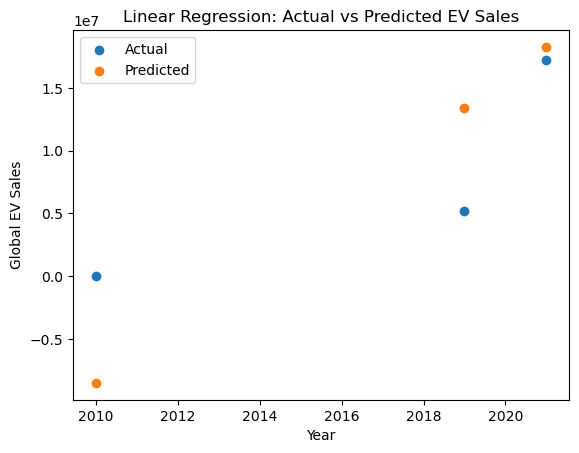

In [45]:

plt.figure()
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, label="Predicted")
plt.xlabel("Year")
plt.ylabel("Global EV Sales")
plt.title("Linear Regression: Actual vs Predicted EV Sales")
plt.legend()
plt.show()

In [46]:
print('The graph shows that while the linear regression captures the general upward trend in EV sales, it does not fit the data well. It performs poorly in the early years and fails to capture the rapid growth in later years, indicating that EV sales grow in a nonlinear pattern rather than a linear one.')

The graph shows that while the linear regression captures the general upward trend in EV sales, it does not fit the data well. It performs poorly in the early years and fails to capture the rapid growth in later years, indicating that EV sales grow in a nonlinear pattern rather than a linear one.


In [50]:
### Polynomial Regression Model

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred = poly_model.predict(X_test_poly)

print("R²:", metrics.r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R²: 0.7291508547696595
RMSE: 3748628.1882330542


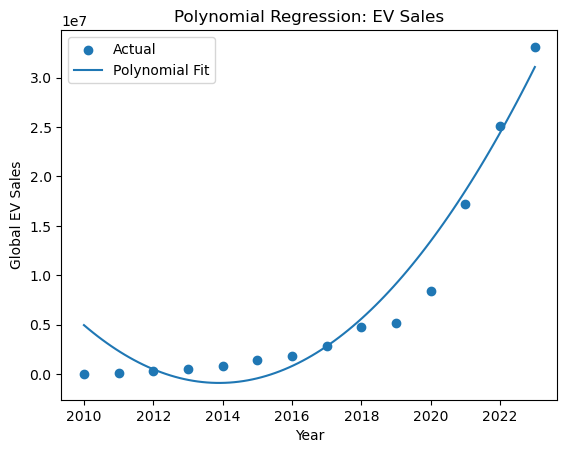

In [51]:

years = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
years_poly = poly.transform(years)
sales_pred = poly_model.predict(years_poly)

plt.figure()
plt.scatter(X, y, label="Actual")
plt.plot(years, sales_pred, label="Polynomial Fit")
plt.xlabel("Year")
plt.ylabel("Global EV Sales")
plt.title("Polynomial Regression: EV Sales")
plt.legend()
plt.show()


In [52]:
print('The graph shows that polynomial regression fits EV sales much better than linear regression. It captures the slow early growth and the rapid increase in recent years, showing that EV sales grow in a nonlinear way.')

The graph shows that polynomial regression fits EV sales much better than linear regression. It captures the slow early growth and the rapid increase in recent years, showing that EV sales grow in a nonlinear way.
